This is the jupyter notebook which will hold our neural networks and be used to create graphs and stuff

In [1]:
import numpy as np
from load import *
all_trials = load_data()
labels = ["X_test",
"y_test",
"person_train_valid",
"X_train_valid",
"y_train_valid",
"person_test"]
print('generating data using all test and all train')
for i, k in enumerate(all_trials):
    print('{}: {} '.format(labels[i], k.shape))
print('generating data using subj 1 test and subj 1 train')
subject_1_trials = load_data_subject_1_train_and_test()
for i, k in enumerate(subject_1_trials):
    print('{}: {} '.format(labels[i], k.shape))
print('generating data using subj 1 test and full train')
subject_1_all_test = load_data_subject_1_test_and_full_train()
for i, k in enumerate(subject_1_all_test):
    print('{}: {} '.format(labels[i], k.shape))

generating data using all test and all train
X_test: (443, 22, 1000) 
y_test: (443,) 
person_train_valid: (2115, 1) 
X_train_valid: (2115, 22, 1000) 
y_train_valid: (2115,) 
person_test: (443, 1) 
generating data using subj 1 test and subj 1 train
X_test: (50, 22, 1000) 
y_test: (50,) 
person_train_valid: (2115, 1) 
X_train_valid: (237, 22, 1000) 
y_train_valid: (237,) 
person_test: (443, 1) 
generating data using subj 1 test and full train
X_test: (50, 22, 1000) 
y_test: (50,) 
person_train_valid: (2115, 1) 
X_train_valid: (2115, 22, 1000) 
y_train_valid: (2115,) 
person_test: (443, 1) 


Also created augmented versions of the datasets

In [2]:
augmented_trials_x = np.concatenate((all_trials[3][:, :, ::2], all_trials[3][:, :, 1::2]), axis=0)
augmented_trials_y = np.concatenate((all_trials[4], all_trials[4]))
augmented_test_x = np.concatenate((all_trials[0][:, :, ::2], all_trials[0][:, :, 1::2]), axis=0)
augmented_test_y = np.concatenate((all_trials[1], all_trials[1]))
print('{}: {} '.format("Augmented x", augmented_trials_x.shape))
print('{}: {} '.format("Augmented y", augmented_trials_y.shape))
print('{}: {} '.format("Aug Test x", augmented_test_x.shape))
print('{}: {} '.format("Aug Test y", augmented_test_y.shape))

Augmented x: (4230, 22, 500) 
Augmented y: (4230,) 
Aug Test x: (886, 22, 500) 
Aug Test y: (886,) 


There are 2115 trials and 1000 timestamps. There are 22 electrodes. There are 443 test trials. There are persons 0-8 (inclusive) and person_train_valid[trial] gives the person that was used in the specific trial. 

train a NN for the first subject

All of these initial CNNs will be done with l2 reg of 0.001, alpha in ELU of .7, learning rate of 0.001 in SGD with nesterov momentum, dropout of 0.5, 200 epochs, and the CNN architecture developed in the paper

1 Physical GPUs, 1 Logical GPUs
Train on 189 samples, validate on 48 samples
Epoch 1/200
189/189 [==============================] - 2s 12ms/sample - loss: 1.7941 - accuracy: 0.3333 - val_loss: 1.4190 - val_accuracy: 0.3125
Epoch 2/200
189/189 [==============================] - 0s 591us/sample - loss: 1.5346 - accuracy: 0.4127 - val_loss: 1.4192 - val_accuracy: 0.2292
Epoch 3/200
189/189 [==============================] - 0s 583us/sample - loss: 1.4459 - accuracy: 0.4286 - val_loss: 1.4183 - val_accuracy: 0.3958
Epoch 4/200
189/189 [==============================] - 0s 604us/sample - loss: 1.2957 - accuracy: 0.5344 - val_loss: 1.4180 - val_accuracy: 0.3958
Epoch 5/200
189/189 [==============================] - 0s 612us/sample - loss: 1.1224 - accuracy: 0.6085 - val_loss: 1.4173 - val_accuracy: 0.2500
Epoch 6/200
189/189 [==============================] - 0s 618us/sample - loss: 1.2961 - accuracy: 0.5185 - val_loss: 1.4164 - val_accuracy: 0.3958
Epoch 7/200
189/189 [=====================

Epoch 56/200
189/189 [==============================] - 0s 644us/sample - loss: 0.2525 - accuracy: 0.9259 - val_loss: 1.3416 - val_accuracy: 0.5833
Epoch 57/200
189/189 [==============================] - 0s 622us/sample - loss: 0.2982 - accuracy: 0.8942 - val_loss: 1.3458 - val_accuracy: 0.5208
Epoch 58/200
189/189 [==============================] - 0s 595us/sample - loss: 0.2256 - accuracy: 0.9471 - val_loss: 1.3368 - val_accuracy: 0.5000
Epoch 59/200
189/189 [==============================] - 0s 602us/sample - loss: 0.3333 - accuracy: 0.8942 - val_loss: 1.2267 - val_accuracy: 0.5625
Epoch 60/200
189/189 [==============================] - 0s 887us/sample - loss: 0.2501 - accuracy: 0.9312 - val_loss: 1.2692 - val_accuracy: 0.5208
Epoch 61/200
189/189 [==============================] - 0s 820us/sample - loss: 0.1770 - accuracy: 0.9577 - val_loss: 1.2900 - val_accuracy: 0.5833
Epoch 62/200
189/189 [==============================] - 0s 679us/sample - loss: 0.2203 - accuracy: 0.9365 - val_

189/189 [==============================] - 0s 620us/sample - loss: 0.0950 - accuracy: 0.9735 - val_loss: 1.3337 - val_accuracy: 0.6875
Epoch 167/200
189/189 [==============================] - 0s 626us/sample - loss: 0.0774 - accuracy: 0.9841 - val_loss: 1.3594 - val_accuracy: 0.6250
Epoch 168/200
189/189 [==============================] - 0s 612us/sample - loss: 0.0698 - accuracy: 0.9894 - val_loss: 1.3911 - val_accuracy: 0.6250
Epoch 169/200
189/189 [==============================] - 0s 656us/sample - loss: 0.0572 - accuracy: 1.0000 - val_loss: 1.4374 - val_accuracy: 0.5833
Epoch 170/200
189/189 [==============================] - 0s 669us/sample - loss: 0.0893 - accuracy: 0.9788 - val_loss: 1.4189 - val_accuracy: 0.6042
Epoch 171/200
189/189 [==============================] - 0s 632us/sample - loss: 0.1167 - accuracy: 0.9577 - val_loss: 1.4096 - val_accuracy: 0.6250
Epoch 172/200
189/189 [==============================] - 0s 619us/sample - loss: 0.1018 - accuracy: 0.9841 - val_loss: 1

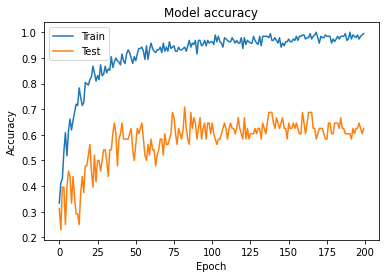

In [4]:
from models import *
init()
model = make_cnn_model(subject_1_trials[3], subject_1_trials[4],
                       subject_1_trials[0], subject_1_trials[1], epochs=200)

In [5]:
test_scores = model.evaluate(all_trials[0].transpose(0, 2, 1)[:, :, :, None], all_trials[1] - 769)
print('Subject 1 Train to Overall Test Loss:', test_scores[0])
print('Subject 1 Train to Overall Test Acc:', test_scores[1])

443/443 [==============================] - 0s 627us/sample - loss: 4.6842 - accuracy: 0.4018
Subject 1 Train to Overall Test Loss: 4.68417809187155
Subject 1 Train to Overall Test Acc: 0.40180588


Consider on all test subjects, no augmentation

1 Physical GPUs, 1 Logical GPUs
Train on 1692 samples, validate on 423 samples
Epoch 1/200
1692/1692 [==============================] - 2s 1ms/sample - loss: 2.0782 - accuracy: 0.2807 - val_loss: 1.4166 - val_accuracy: 0.2600
Epoch 2/200
1692/1692 [==============================] - 1s 635us/sample - loss: 1.8196 - accuracy: 0.3712 - val_loss: 1.4006 - val_accuracy: 0.3546
Epoch 3/200
1692/1692 [==============================] - 1s 609us/sample - loss: 1.6385 - accuracy: 0.4007 - val_loss: 1.3556 - val_accuracy: 0.3830
Epoch 4/200
1692/1692 [==============================] - 1s 596us/sample - loss: 1.5371 - accuracy: 0.4285 - val_loss: 1.2656 - val_accuracy: 0.4326
Epoch 5/200
1692/1692 [==============================] - 1s 591us/sample - loss: 1.4438 - accuracy: 0.4379 - val_loss: 1.2158 - val_accuracy: 0.4775
Epoch 6/200
1692/1692 [==============================] - 1s 601us/sample - loss: 1.3974 - accuracy: 0.4651 - val_loss: 1.2042 - val_accuracy: 0.4728
Epoch 7/200
1692/1692 [======

1692/1692 [==============================] - 1s 639us/sample - loss: 0.6327 - accuracy: 0.7671 - val_loss: 1.0495 - val_accuracy: 0.6359
Epoch 110/200
1692/1692 [==============================] - 1s 605us/sample - loss: 0.5917 - accuracy: 0.7866 - val_loss: 1.0067 - val_accuracy: 0.6501
Epoch 111/200
1692/1692 [==============================] - 1s 667us/sample - loss: 0.6066 - accuracy: 0.7861 - val_loss: 0.9296 - val_accuracy: 0.6714
Epoch 112/200
1692/1692 [==============================] - 1s 637us/sample - loss: 0.5743 - accuracy: 0.7961 - val_loss: 0.9751 - val_accuracy: 0.6572
Epoch 113/200
1692/1692 [==============================] - 1s 666us/sample - loss: 0.5878 - accuracy: 0.7831 - val_loss: 0.9744 - val_accuracy: 0.6478
Epoch 114/200
1692/1692 [==============================] - 1s 788us/sample - loss: 0.5934 - accuracy: 0.7996 - val_loss: 0.9899 - val_accuracy: 0.6525
Epoch 115/200
1692/1692 [==============================] - 1s 745us/sample - loss: 0.5881 - accuracy: 0.7884

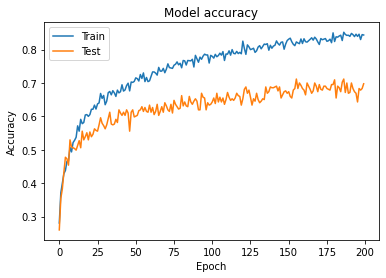

In [7]:
from models import *
init()
model = make_cnn_model(all_trials[3], all_trials[4], all_trials[0], all_trials[1], epochs=200)                       


RMSprop

1 Physical GPUs, 1 Logical GPUs
Train on 1692 samples, validate on 423 samples
Epoch 1/200
1692/1692 [==============================] - 3s 2ms/sample - loss: 1.8486 - accuracy: 0.3180 - val_loss: 1.4177 - val_accuracy: 0.3286
Epoch 2/200
1692/1692 [==============================] - 1s 610us/sample - loss: 1.7769 - accuracy: 0.3635 - val_loss: 1.4084 - val_accuracy: 0.3452
Epoch 3/200
1692/1692 [==============================] - 1s 601us/sample - loss: 1.6874 - accuracy: 0.3682 - val_loss: 1.3844 - val_accuracy: 0.4326
Epoch 4/200
1692/1692 [==============================] - 1s 597us/sample - loss: 1.6024 - accuracy: 0.3836 - val_loss: 1.3062 - val_accuracy: 0.4657
Epoch 5/200
1692/1692 [==============================] - 1s 611us/sample - loss: 1.5738 - accuracy: 0.4214 - val_loss: 1.2632 - val_accuracy: 0.4303
Epoch 6/200
1692/1692 [==============================] - 1s 607us/sample - loss: 1.5042 - accuracy: 0.4285 - val_loss: 1.2761 - val_accuracy: 0.4397
Epoch 7/200
1692/1692 [======

1692/1692 [==============================] - 1s 619us/sample - loss: 0.5349 - accuracy: 0.8168 - val_loss: 1.1763 - val_accuracy: 0.6336
Epoch 110/200
1692/1692 [==============================] - 1s 731us/sample - loss: 0.5160 - accuracy: 0.8310 - val_loss: 1.1512 - val_accuracy: 0.6312
Epoch 111/200
1692/1692 [==============================] - 1s 645us/sample - loss: 0.5143 - accuracy: 0.8268 - val_loss: 1.1004 - val_accuracy: 0.6809
Epoch 112/200
1692/1692 [==============================] - 1s 643us/sample - loss: 0.5118 - accuracy: 0.8298 - val_loss: 1.1205 - val_accuracy: 0.6454
Epoch 113/200
1692/1692 [==============================] - 1s 641us/sample - loss: 0.5249 - accuracy: 0.8115 - val_loss: 1.1040 - val_accuracy: 0.6548
Epoch 114/200
1692/1692 [==============================] - 1s 593us/sample - loss: 0.5150 - accuracy: 0.8132 - val_loss: 1.1334 - val_accuracy: 0.6548
Epoch 115/200
1692/1692 [==============================] - 1s 724us/sample - loss: 0.5127 - accuracy: 0.8304

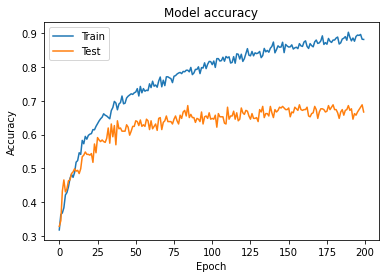

In [3]:
from models import *
init()
model = make_cnn_model(all_trials[3], all_trials[4], all_trials[0], all_trials[1],
                       learning_rate=0.0001, epochs=200, optim='RMSprop')                       


Adam CNN

1 Physical GPUs, 1 Logical GPUs
Train on 1692 samples, validate on 423 samples
Epoch 1/200
1692/1692 [==============================] - 3s 2ms/sample - loss: 1.7696 - accuracy: 0.3209 - val_loss: 1.4163 - val_accuracy: 0.3924
Epoch 2/200
1692/1692 [==============================] - 1s 597us/sample - loss: 1.6499 - accuracy: 0.3717 - val_loss: 1.4098 - val_accuracy: 0.3617
Epoch 3/200
1692/1692 [==============================] - 1s 632us/sample - loss: 1.6036 - accuracy: 0.3871 - val_loss: 1.3773 - val_accuracy: 0.4374
Epoch 4/200
1692/1692 [==============================] - 1s 605us/sample - loss: 1.5412 - accuracy: 0.4190 - val_loss: 1.3044 - val_accuracy: 0.4444
Epoch 5/200
1692/1692 [==============================] - 1s 680us/sample - loss: 1.4897 - accuracy: 0.4368 - val_loss: 1.1923 - val_accuracy: 0.5083
Epoch 6/200
1692/1692 [==============================] - 1s 584us/sample - loss: 1.4783 - accuracy: 0.4344 - val_loss: 1.1442 - val_accuracy: 0.5059
Epoch 7/200
1692/1692 [======

1692/1692 [==============================] - 1s 584us/sample - loss: 0.6388 - accuracy: 0.7671 - val_loss: 0.9372 - val_accuracy: 0.6548
Epoch 110/200
1692/1692 [==============================] - 1s 595us/sample - loss: 0.6537 - accuracy: 0.7530 - val_loss: 0.9272 - val_accuracy: 0.6643
Epoch 111/200
1692/1692 [==============================] - 1s 588us/sample - loss: 0.6679 - accuracy: 0.7654 - val_loss: 0.9136 - val_accuracy: 0.6714
Epoch 112/200
1692/1692 [==============================] - 1s 606us/sample - loss: 0.6447 - accuracy: 0.7642 - val_loss: 0.9104 - val_accuracy: 0.6596
Epoch 113/200
1692/1692 [==============================] - 1s 596us/sample - loss: 0.6221 - accuracy: 0.7807 - val_loss: 0.8765 - val_accuracy: 0.6738
Epoch 114/200
1692/1692 [==============================] - 1s 584us/sample - loss: 0.6169 - accuracy: 0.7677 - val_loss: 0.8912 - val_accuracy: 0.6596
Epoch 115/200
1692/1692 [==============================] - 1s 591us/sample - loss: 0.6291 - accuracy: 0.7772

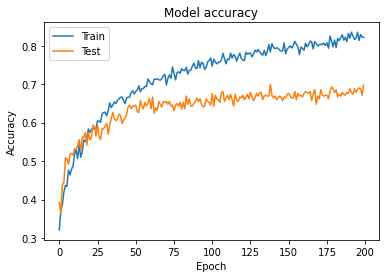

In [3]:
from models import *
init()
model = make_cnn_model(all_trials[3], all_trials[4], all_trials[0], all_trials[1],
                       learning_rate=0.0001, epochs=200, optim='Adam')      

Augmented data CNN w/ SGD

1 Physical GPUs, 1 Logical GPUs
Train on 3384 samples, validate on 846 samples
Epoch 1/200
3384/3384 [==============================] - 3s 962us/sample - loss: 1.8354 - accuracy: 0.3277 - val_loss: 1.4089 - val_accuracy: 0.2884
Epoch 2/200
3384/3384 [==============================] - 1s 379us/sample - loss: 1.5712 - accuracy: 0.3454 - val_loss: 1.3043 - val_accuracy: 0.4468
Epoch 3/200
3384/3384 [==============================] - 1s 368us/sample - loss: 1.4474 - accuracy: 0.3877 - val_loss: 1.2119 - val_accuracy: 0.4764
Epoch 4/200
3384/3384 [==============================] - 1s 425us/sample - loss: 1.3513 - accuracy: 0.4241 - val_loss: 1.1295 - val_accuracy: 0.5177
Epoch 5/200
3384/3384 [==============================] - 1s 372us/sample - loss: 1.3155 - accuracy: 0.4495 - val_loss: 1.2141 - val_accuracy: 0.4846
Epoch 6/200
3384/3384 [==============================] - 1s 380us/sample - loss: 1.2767 - accuracy: 0.4563 - val_loss: 1.0850 - val_accuracy: 0.5414
Epoch 7/200
3384/3384 [====

3384/3384 [==============================] - 1s 386us/sample - loss: 0.6069 - accuracy: 0.7843 - val_loss: 0.4340 - val_accuracy: 0.8416
Epoch 110/200
3384/3384 [==============================] - 1s 392us/sample - loss: 0.6209 - accuracy: 0.7796 - val_loss: 0.4086 - val_accuracy: 0.8511
Epoch 111/200
3384/3384 [==============================] - 1s 420us/sample - loss: 0.6060 - accuracy: 0.7810 - val_loss: 0.4565 - val_accuracy: 0.8381
Epoch 112/200
3384/3384 [==============================] - 1s 377us/sample - loss: 0.6035 - accuracy: 0.7798 - val_loss: 0.4247 - val_accuracy: 0.8452
Epoch 113/200
3384/3384 [==============================] - 1s 373us/sample - loss: 0.6054 - accuracy: 0.7798 - val_loss: 0.4223 - val_accuracy: 0.8463
Epoch 114/200
3384/3384 [==============================] - 1s 385us/sample - loss: 0.6036 - accuracy: 0.7872 - val_loss: 0.4058 - val_accuracy: 0.8629
Epoch 115/200
3384/3384 [==============================] - 1s 355us/sample - loss: 0.5918 - accuracy: 0.7716

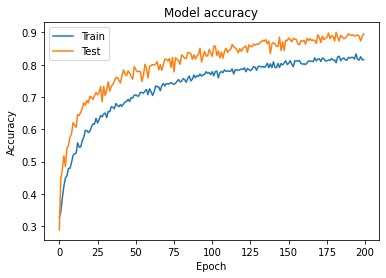

In [3]:
from models import *
init()
model = make_cnn_model(augmented_trials_x, augmented_trials_y,
                       augmented_test_x, augmented_test_y,
                       epochs=200)                       


Fully Optimized CNN

1 Physical GPUs, 1 Logical GPUs
Train on 3384 samples, validate on 846 samples
Epoch 1/300
3384/3384 [==============================] - 4s 1ms/sample - loss: 1.8974 - accuracy: 0.3259 - val_loss: 1.4915 - val_accuracy: 0.3333
Epoch 2/300
3384/3384 [==============================] - 2s 444us/sample - loss: 1.6367 - accuracy: 0.3833 - val_loss: 1.3850 - val_accuracy: 0.4693
Epoch 3/300
3384/3384 [==============================] - 2s 459us/sample - loss: 1.4789 - accuracy: 0.4258 - val_loss: 1.2247 - val_accuracy: 0.5095
Epoch 4/300
3384/3384 [==============================] - 2s 501us/sample - loss: 1.4195 - accuracy: 0.4486 - val_loss: 1.1438 - val_accuracy: 0.5508
Epoch 5/300
3384/3384 [==============================] - 1s 426us/sample - loss: 1.3410 - accuracy: 0.4861 - val_loss: 1.0668 - val_accuracy: 0.5969
Epoch 6/300
3384/3384 [==============================] - 2s 454us/sample - loss: 1.2998 - accuracy: 0.5024 - val_loss: 1.0199 - val_accuracy: 0.6489
Epoch 7/300
3384/3384 [======

3384/3384 [==============================] - 2s 483us/sample - loss: 0.6105 - accuracy: 0.8082 - val_loss: 0.4453 - val_accuracy: 0.8747
Epoch 110/300
3384/3384 [==============================] - 1s 428us/sample - loss: 0.6326 - accuracy: 0.8017 - val_loss: 0.4276 - val_accuracy: 0.8865
Epoch 111/300
3384/3384 [==============================] - 1s 414us/sample - loss: 0.6078 - accuracy: 0.8017 - val_loss: 0.4374 - val_accuracy: 0.8723
Epoch 112/300
3384/3384 [==============================] - 1s 427us/sample - loss: 0.6033 - accuracy: 0.8103 - val_loss: 0.4284 - val_accuracy: 0.8806
Epoch 113/300
3384/3384 [==============================] - 2s 605us/sample - loss: 0.5979 - accuracy: 0.8112 - val_loss: 0.4260 - val_accuracy: 0.8830
Epoch 114/300
3384/3384 [==============================] - 2s 595us/sample - loss: 0.6064 - accuracy: 0.8094 - val_loss: 0.4239 - val_accuracy: 0.8700
Epoch 115/300
3384/3384 [==============================] - 2s 456us/sample - loss: 0.6084 - accuracy: 0.8061

3384/3384 [==============================] - 2s 491us/sample - loss: 0.4551 - accuracy: 0.8661 - val_loss: 0.3127 - val_accuracy: 0.9255
Epoch 218/300
3384/3384 [==============================] - 2s 460us/sample - loss: 0.4596 - accuracy: 0.8644 - val_loss: 0.2956 - val_accuracy: 0.9326
Epoch 219/300
3384/3384 [==============================] - 2s 473us/sample - loss: 0.4720 - accuracy: 0.8623 - val_loss: 0.2951 - val_accuracy: 0.9444
Epoch 220/300
3384/3384 [==============================] - 1s 431us/sample - loss: 0.4444 - accuracy: 0.8738 - val_loss: 0.2999 - val_accuracy: 0.9421
Epoch 221/300
3384/3384 [==============================] - 1s 429us/sample - loss: 0.4480 - accuracy: 0.8756 - val_loss: 0.2861 - val_accuracy: 0.9421
Epoch 222/300
3384/3384 [==============================] - 2s 477us/sample - loss: 0.4611 - accuracy: 0.8655 - val_loss: 0.2875 - val_accuracy: 0.9385
Epoch 223/300
3384/3384 [==============================] - 1s 438us/sample - loss: 0.4661 - accuracy: 0.8682

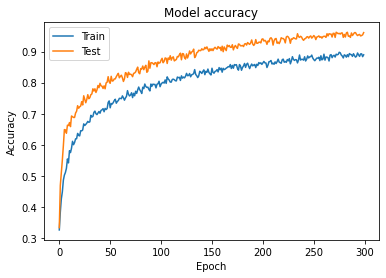

In [3]:
from models import *
init()
model = make_cnn_model(augmented_trials_x, augmented_trials_y, augmented_test_x, augmented_test_y,
                       reg=0.003, dropout=0.45, learning_rate=0.0001, alpha=0.75, epochs=300,
                       relative_size=1.2, optim='Adam')

RNN with SGD

1 Physical GPUs, 1 Logical GPUs
Train on 1692 samples, validate on 423 samples
Epoch 1/200
1692/1692 [==============================] - 7s 4ms/sample - loss: 5.1611 - accuracy: 0.2790 - val_loss: 4.9795 - val_accuracy: 0.2530
Epoch 2/200
1692/1692 [==============================] - 4s 2ms/sample - loss: 6.2450 - accuracy: 0.3097 - val_loss: 7.4036 - val_accuracy: 0.2530
Epoch 3/200
1692/1692 [==============================] - 4s 2ms/sample - loss: 6.4978 - accuracy: 0.3310 - val_loss: 9.3120 - val_accuracy: 0.2577
Epoch 4/200
1692/1692 [==============================] - 4s 2ms/sample - loss: 6.8592 - accuracy: 0.3652 - val_loss: 8.7560 - val_accuracy: 0.3262
Epoch 5/200
1692/1692 [==============================] - 4s 2ms/sample - loss: 7.4952 - accuracy: 0.3593 - val_loss: 12.4482 - val_accuracy: 0.2884
Epoch 6/200
1692/1692 [==============================] - 4s 2ms/sample - loss: 7.8153 - accuracy: 0.3765 - val_loss: 11.0441 - val_accuracy: 0.3097
Epoch 7/200
1692/1692 [==============

1692/1692 [==============================] - 4s 2ms/sample - loss: 2.1500 - accuracy: 0.8375 - val_loss: 12.9371 - val_accuracy: 0.4870
Epoch 111/200
1692/1692 [==============================] - 4s 2ms/sample - loss: 2.2214 - accuracy: 0.8245 - val_loss: 13.8446 - val_accuracy: 0.4894
Epoch 112/200
1692/1692 [==============================] - 4s 2ms/sample - loss: 2.0976 - accuracy: 0.8410 - val_loss: 13.2332 - val_accuracy: 0.4965
Epoch 113/200
1692/1692 [==============================] - 4s 2ms/sample - loss: 2.1518 - accuracy: 0.8392 - val_loss: 13.6600 - val_accuracy: 0.4988
Epoch 114/200
1692/1692 [==============================] - 4s 2ms/sample - loss: 2.1785 - accuracy: 0.8227 - val_loss: 14.0097 - val_accuracy: 0.4965
Epoch 115/200
1692/1692 [==============================] - 4s 2ms/sample - loss: 1.9964 - accuracy: 0.8363 - val_loss: 13.4717 - val_accuracy: 0.5083
Epoch 116/200
1692/1692 [==============================] - 4s 2ms/sample - loss: 2.1844 - accuracy: 0.8262 - val_l

Epoch 165/200
1692/1692 [==============================] - 4s 2ms/sample - loss: 1.3932 - accuracy: 0.8759 - val_loss: 11.8414 - val_accuracy: 0.5201
Epoch 166/200
1692/1692 [==============================] - 4s 2ms/sample - loss: 1.4238 - accuracy: 0.8741 - val_loss: 11.7561 - val_accuracy: 0.5059
Epoch 167/200
1692/1692 [==============================] - 4s 2ms/sample - loss: 1.4277 - accuracy: 0.8836 - val_loss: 12.1422 - val_accuracy: 0.5130
Epoch 168/200
1692/1692 [==============================] - 4s 2ms/sample - loss: 1.3174 - accuracy: 0.8848 - val_loss: 12.1314 - val_accuracy: 0.4846
Epoch 169/200
1692/1692 [==============================] - 4s 2ms/sample - loss: 1.3940 - accuracy: 0.8783 - val_loss: 12.0389 - val_accuracy: 0.4988
Epoch 170/200
1692/1692 [==============================] - 4s 2ms/sample - loss: 1.4270 - accuracy: 0.8735 - val_loss: 11.3248 - val_accuracy: 0.5035
Epoch 171/200
1692/1692 [==============================] - 4s 2ms/sample - loss: 1.2148 - accuracy: 

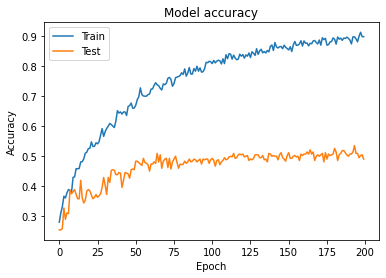

In [3]:
from models import *
init()
model = make_lstm_model(all_trials[3], all_trials[4], all_trials[0], all_trials[1], epochs=200)

RNN with RMSprop

1 Physical GPUs, 1 Logical GPUs
Train on 1692 samples, validate on 423 samples
Epoch 1/200
1692/1692 [==============================] - 8s 4ms/sample - loss: 3.9242 - accuracy: 0.3008 - val_loss: 1.7824 - val_accuracy: 0.2388
Epoch 2/200
1692/1692 [==============================] - 4s 2ms/sample - loss: 4.2170 - accuracy: 0.3298 - val_loss: 2.3812 - val_accuracy: 0.2813
Epoch 3/200
1692/1692 [==============================] - 4s 2ms/sample - loss: 4.4368 - accuracy: 0.3446 - val_loss: 3.8675 - val_accuracy: 0.3097
Epoch 4/200
1692/1692 [==============================] - 4s 2ms/sample - loss: 4.6488 - accuracy: 0.3830 - val_loss: 2.9014 - val_accuracy: 0.3522
Epoch 5/200
1692/1692 [==============================] - 4s 2ms/sample - loss: 4.8085 - accuracy: 0.3741 - val_loss: 4.2911 - val_accuracy: 0.3641
Epoch 6/200
1692/1692 [==============================] - 4s 2ms/sample - loss: 4.6984 - accuracy: 0.3948 - val_loss: 6.7051 - val_accuracy: 0.3144
Epoch 7/200
1692/1692 [================

1692/1692 [==============================] - 4s 3ms/sample - loss: 4.0915 - accuracy: 0.7270 - val_loss: 24.2363 - val_accuracy: 0.4208
Epoch 111/200
1692/1692 [==============================] - 4s 2ms/sample - loss: 3.8826 - accuracy: 0.7281 - val_loss: 24.0702 - val_accuracy: 0.4113
Epoch 112/200
1692/1692 [==============================] - 4s 2ms/sample - loss: 4.2060 - accuracy: 0.7340 - val_loss: 22.4834 - val_accuracy: 0.4184
Epoch 113/200
1692/1692 [==============================] - 4s 2ms/sample - loss: 4.0685 - accuracy: 0.7400 - val_loss: 23.5237 - val_accuracy: 0.4066
Epoch 114/200
1692/1692 [==============================] - 4s 2ms/sample - loss: 3.9498 - accuracy: 0.7423 - val_loss: 22.5796 - val_accuracy: 0.4184
Epoch 115/200
1692/1692 [==============================] - 4s 2ms/sample - loss: 4.0266 - accuracy: 0.7429 - val_loss: 20.2807 - val_accuracy: 0.4255
Epoch 116/200
1692/1692 [==============================] - 4s 2ms/sample - loss: 4.0117 - accuracy: 0.7476 - val_l

Epoch 165/200
1692/1692 [==============================] - 4s 2ms/sample - loss: 3.2997 - accuracy: 0.7937 - val_loss: 18.0236 - val_accuracy: 0.4515
Epoch 166/200
1692/1692 [==============================] - 4s 3ms/sample - loss: 3.8664 - accuracy: 0.7825 - val_loss: 15.5205 - val_accuracy: 0.4799
Epoch 167/200
1692/1692 [==============================] - 4s 2ms/sample - loss: 3.4072 - accuracy: 0.7831 - val_loss: 17.3584 - val_accuracy: 0.4704
Epoch 168/200
1692/1692 [==============================] - 4s 3ms/sample - loss: 3.2745 - accuracy: 0.8091 - val_loss: 16.8092 - val_accuracy: 0.4846
Epoch 169/200
1692/1692 [==============================] - 4s 2ms/sample - loss: 3.3801 - accuracy: 0.7985 - val_loss: 17.9533 - val_accuracy: 0.4586
Epoch 170/200
1692/1692 [==============================] - 4s 2ms/sample - loss: 3.2454 - accuracy: 0.7991 - val_loss: 19.8389 - val_accuracy: 0.4586
Epoch 171/200
1692/1692 [==============================] - 4s 2ms/sample - loss: 3.6209 - accuracy: 

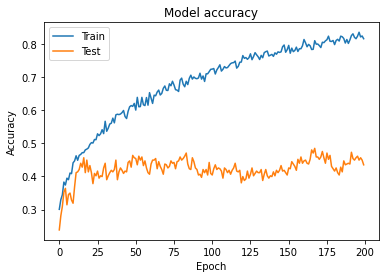

In [3]:
from models import *
init()
model = make_lstm_model(all_trials[3], all_trials[4], all_trials[0], all_trials[1],
                        epochs=200, learning_rate=0.0001, optim='RMSprop')

RNN with Adam

In [4]:
from models import *
init()
model = make_lstm_model(all_trials[3], all_trials[4], all_trials[0], all_trials[1],
                        epochs=200, learning_rate=0.0001, optim='Adam')

1 Physical GPUs, 1 Logical GPUs
Train on 1692 samples, validate on 423 samples
Epoch 1/200
1692/1692 [==============================] - 7s 4ms/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/200
1692/1692 [==============================] - 4s 2ms/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/200
1692/1692 [==============================] - 4s 2ms/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/200
1692/1692 [==============================] - 4s 3ms/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/200
1692/1692 [==============================] - 4s 2ms/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/200
1692/1692 [==============================] - 4s 2ms/sample - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/200
1692/1692 [====

KeyboardInterrupt: 

VAE to CNN

Using TensorFlow backend.


1 Physical GPUs, 1 Logical GPUs
Train on 1692 samples, validate on 423 samples
Epoch 1/200
1692/1692 [==============================] - 1s 505us/step - loss: 1604.1785 - val_loss: 1388.0087
Epoch 2/200
1692/1692 [==============================] - 1s 300us/step - loss: 214.5523 - val_loss: 472.3031
Epoch 3/200
1692/1692 [==============================] - 1s 304us/step - loss: 159.8751 - val_loss: 285.5005
Epoch 4/200
1692/1692 [==============================] - 1s 303us/step - loss: 179.4617 - val_loss: 334.8645
Epoch 5/200
1692/1692 [==============================] - 1s 306us/step - loss: 275.8090 - val_loss: 385.1301
Epoch 6/200
1692/1692 [==============================] - 1s 327us/step - loss: 446.5299 - val_loss: 403.0522
Epoch 7/200
1692/1692 [==============================] - 1s 302us/step - loss: 359.2155 - val_loss: 370.0065
Epoch 8/200
1692/1692 [==============================] - 1s 296us/step - loss: 303.5532 - val_loss: 291.0577
Epoch 9/200
1692/1692 [========================

Epoch 75/200
1692/1692 [==============================] - 1s 312us/step - loss: 106.7432 - val_loss: 144.6689
Epoch 76/200
1692/1692 [==============================] - 1s 299us/step - loss: 106.8501 - val_loss: 174.3017
Epoch 77/200
1692/1692 [==============================] - 1s 297us/step - loss: 119.5326 - val_loss: 171.0663
Epoch 78/200
1692/1692 [==============================] - 1s 296us/step - loss: 121.1979 - val_loss: 172.0012
Epoch 79/200
1692/1692 [==============================] - 0s 290us/step - loss: 145.4383 - val_loss: 170.0241
Epoch 80/200
1692/1692 [==============================] - 1s 302us/step - loss: 121.2578 - val_loss: 153.1441
Epoch 81/200
1692/1692 [==============================] - 0s 291us/step - loss: 122.0381 - val_loss: 153.8570
Epoch 82/200
1692/1692 [==============================] - 0s 289us/step - loss: 113.4903 - val_loss: 180.9362
Epoch 83/200
1692/1692 [==============================] - 0s 295us/step - loss: 118.9712 - val_loss: 148.3045
Epoch 84/2

1692/1692 [==============================] - 1s 302us/step - loss: 114.8714 - val_loss: 137.4800
Epoch 150/200
1692/1692 [==============================] - 0s 290us/step - loss: 107.6729 - val_loss: 159.8717
Epoch 151/200
1692/1692 [==============================] - 0s 294us/step - loss: 108.1325 - val_loss: 135.6942
Epoch 152/200
1692/1692 [==============================] - 0s 293us/step - loss: 107.6388 - val_loss: 129.7242
Epoch 153/200
1692/1692 [==============================] - 0s 294us/step - loss: 110.9488 - val_loss: 129.8425
Epoch 154/200
1692/1692 [==============================] - 0s 293us/step - loss: 112.7899 - val_loss: 133.4940
Epoch 155/200
1692/1692 [==============================] - 0s 286us/step - loss: 115.5284 - val_loss: 159.5363
Epoch 156/200
1692/1692 [==============================] - 0s 288us/step - loss: 118.9331 - val_loss: 137.4089
Epoch 157/200
1692/1692 [==============================] - 0s 291us/step - loss: 113.3413 - val_loss: 135.7720
Epoch 158/200
1

Epoch 17/200
1692/1692 [==============================] - 1s 569us/sample - loss: 1.6708 - accuracy: 0.2654 - val_loss: 1.6465 - val_accuracy: 0.2719
Epoch 18/200
1692/1692 [==============================] - 1s 431us/sample - loss: 1.6613 - accuracy: 0.2606 - val_loss: 1.6296 - val_accuracy: 0.2553
Epoch 19/200
1692/1692 [==============================] - 1s 380us/sample - loss: 1.6485 - accuracy: 0.2648 - val_loss: 1.6472 - val_accuracy: 0.2671
Epoch 20/200
1692/1692 [==============================] - 1s 349us/sample - loss: 1.6382 - accuracy: 0.2813 - val_loss: 1.7059 - val_accuracy: 0.2813
Epoch 21/200
1692/1692 [==============================] - 1s 364us/sample - loss: 1.6710 - accuracy: 0.2784 - val_loss: 1.6560 - val_accuracy: 0.2695
Epoch 22/200
1692/1692 [==============================] - 1s 435us/sample - loss: 1.6187 - accuracy: 0.2707 - val_loss: 1.7618 - val_accuracy: 0.2530
Epoch 23/200
1692/1692 [==============================] - 1s 451us/sample - loss: 1.6603 - accuracy:

1692/1692 [==============================] - 1s 605us/sample - loss: 1.4934 - accuracy: 0.3014 - val_loss: 1.5717 - val_accuracy: 0.2790
Epoch 72/200
1692/1692 [==============================] - 1s 372us/sample - loss: 1.4966 - accuracy: 0.2796 - val_loss: 1.6255 - val_accuracy: 0.2742
Epoch 73/200
1692/1692 [==============================] - 1s 376us/sample - loss: 1.5180 - accuracy: 0.2902 - val_loss: 1.5795 - val_accuracy: 0.2931
Epoch 74/200
1692/1692 [==============================] - 1s 364us/sample - loss: 1.5147 - accuracy: 0.2825 - val_loss: 1.6537 - val_accuracy: 0.2861
Epoch 75/200
1692/1692 [==============================] - 1s 388us/sample - loss: 1.4531 - accuracy: 0.3044 - val_loss: 1.7199 - val_accuracy: 0.2790
Epoch 76/200
1692/1692 [==============================] - 1s 507us/sample - loss: 1.4802 - accuracy: 0.2872 - val_loss: 1.6391 - val_accuracy: 0.2813
Epoch 77/200
1692/1692 [==============================] - 1s 518us/sample - loss: 1.4687 - accuracy: 0.3103 - val

1692/1692 [==============================] - 1s 337us/sample - loss: 1.4082 - accuracy: 0.2902 - val_loss: 1.5939 - val_accuracy: 0.2813
Epoch 126/200
1692/1692 [==============================] - 1s 343us/sample - loss: 1.4193 - accuracy: 0.3038 - val_loss: 1.5862 - val_accuracy: 0.2837
Epoch 127/200
1692/1692 [==============================] - 1s 348us/sample - loss: 1.3934 - accuracy: 0.3073 - val_loss: 1.6009 - val_accuracy: 0.2813
Epoch 128/200
1692/1692 [==============================] - 1s 480us/sample - loss: 1.4067 - accuracy: 0.3044 - val_loss: 1.6046 - val_accuracy: 0.2861
Epoch 129/200
1692/1692 [==============================] - 1s 451us/sample - loss: 1.3880 - accuracy: 0.3245 - val_loss: 1.5797 - val_accuracy: 0.2884
Epoch 130/200
1692/1692 [==============================] - 1s 400us/sample - loss: 1.4097 - accuracy: 0.3014 - val_loss: 1.5922 - val_accuracy: 0.2813
Epoch 131/200
1692/1692 [==============================] - 1s 360us/sample - loss: 1.4056 - accuracy: 0.3056

1692/1692 [==============================] - 1s 518us/sample - loss: 1.3918 - accuracy: 0.3038 - val_loss: 1.6179 - val_accuracy: 0.2813
Epoch 180/200
1692/1692 [==============================] - 1s 478us/sample - loss: 1.3760 - accuracy: 0.3079 - val_loss: 1.6452 - val_accuracy: 0.2837
Epoch 181/200
1692/1692 [==============================] - 1s 635us/sample - loss: 1.3755 - accuracy: 0.3327 - val_loss: 1.6345 - val_accuracy: 0.2813
Epoch 182/200
1692/1692 [==============================] - 1s 433us/sample - loss: 1.3803 - accuracy: 0.3121 - val_loss: 1.6377 - val_accuracy: 0.2766
Epoch 183/200
1692/1692 [==============================] - 1s 435us/sample - loss: 1.3695 - accuracy: 0.3186 - val_loss: 1.6252 - val_accuracy: 0.2861
Epoch 184/200
1692/1692 [==============================] - 1s 412us/sample - loss: 1.3573 - accuracy: 0.3126 - val_loss: 1.6235 - val_accuracy: 0.2790
Epoch 185/200
1692/1692 [==============================] - 1s 394us/sample - loss: 1.3640 - accuracy: 0.3138

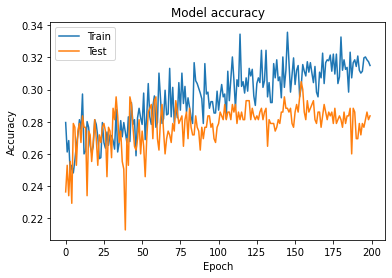

In [3]:
from models import *
init()
model = make_vae_model(all_trials[3], all_trials[4], all_trials[0], all_trials[1],
                        epochs=200, learning_rate=0.0001, optim='Adam')